<header>
<h1 style="text-align: center;">Modelos de machine learning a una base de datos sobre diabetes<h1/>
<p style="text-align: center;"><img  src="descarga.jpeg" alt="description" width=600" height="100" />
</p>

<h2>Autores</h2>
    <p>Julio Torres.</p>
</header>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
url='/home/julio/jupyter_files/diabete/Diabetes/diabetes.csv'
df=pd.read_csv(url)

<H2>Nombre de las columnas<H2/>
    
<p style="margin: 0; line-height: 1.2; font-size: 10px;">Pregnancies --> Number of times pregnant</p>
<p style="margin: 0; line-height: 1.2; font-size: 10px">Glucose --> Plasma glucose concentration a 2 hours in an oral glucose tolerance test</p>
<p style="margin: 0; line-height: 1.2; font-size: 10px" >BloodPressure --> Diastolic blood pressure (mm Hg)</p>
<p style="margin: 0; line-height: 1.2; font-size: 10px">SkinThickness --> Triceps skin fold thickness (mm)</p>
<p style="margin: 0; line-height: 1.2; font-size: 10px"> Insulin--> 2-Hour serum insulin (mu U/ml)</p>
<p style="margin: 0; line-height: 1.2; font-size: 10px"> BMI --> Body mass index (weight in kg/(height in m)^2) </p>
<p style="margin: 0; line-height: 1.2; font-size: 10px">DiabetesPedigreeFunction -->
Diabetes pedigree function </p>
<p style="margin: 0; line-height: 1.2; font-size: 10px">Age --> Age (years)</p>
<p style="margin: 0; line-height: 1.2; font-size: 10px">Outcome -->Class variable (0 or 1) 268 of 768 are 1, the others are 0 </p>

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Calculamos el porcentaje de valores nulos por columna
null_percentage = df.isnull().mean() * 100
# Mostrar el resultado
print(null_percentage)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


<H2>Modelos de Machine learning</H2>

<h3>Random Forest</h3>

**Random Forest** es un algoritmo de aprendizaje automático que crea un conjunto de árboles de decisión (un "bosque") y combina sus resultados para hacer predicciones. Cada árbol se entrena con una muestra aleatoria del conjunto de datos y utiliza un subconjunto aleatorio de características en cada división. El resultado final se obtiene promediando las predicciones de todos los árboles (en problemas de regresión) o tomando la mayoría de las votaciones (en problemas de clasificación).

**¿Por Qué Usar Random Forest en Este Proyecto?**

- **Robustez**: Random Forest es menos propenso al sobreajuste en comparación con un solo árbol de decisión, ya que combina múltiples árboles que mitigarán errores individuales.
- **Manejo de Datos Desequilibrados**: Puede manejar desequilibrios en las clases de manera efectiva, lo cual es útil si tienes datos desbalanceados.
- **Importancia de Características**: Proporciona una medida de la importancia de las características, lo que puede ayudarte a entender qué variables son más relevantes para las predicciones.
- **Versatilidad**: Funciona bien con datos tanto numéricos como categóricos y no requiere una gran cantidad de ajuste de hiperparámetros.

**Importamos las librerías**

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import joblib

**Importamos el dataframe**

In [9]:
url='/home/julio/jupyter_files/diabete/Diabetes/diabetes.csv'
df1=pd.read_csv(url)

<P> Preparar los datos para el entrenamiento de un modelo de Machine Learning.X contiene las variables que se usan para predecir y y contiene la variable que el modelo debe predecir. Este paso es crucial para separar los datos en características y etiquetas antes de entrenar el modelo. </P>

In [10]:
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

**Dividir los datos** 
    
Se entrena el modelo con X_train y y_train, y luego se prueba con X_test y y_test para ver cómo generaliza a datos que no ha visto antes.

In [11]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Aplicación de SMOTE para Manejar el Desbalance de Clases**

Este paso utiliza la técnica SMOTE (Synthetic Minority Over-sampling Technique) para generar muestras sintéticas de la clase minoritaria en un conjunto de datos desbalanceado, con el fin de equilibrar el número de ejemplos entre las clases. Esto ayuda a mejorar la capacidad del modelo para aprender de manera justa y generalizar mejor.

In [12]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Creación de un Pipeline con Estandarización, Reducción de Dimensionalidad y Modelo Random Forest.**

Este paso crea un pipeline que incluye tres etapas de procesamiento y modelado:

**Estandarización:** StandardScaler estandariza las características para que tengan media cero y desviación estándar uno, asegurando que todas las características tengan el mismo rango.

**Reducción de Dimensionalidad:** PCA (Principal Component Analysis) reduce el número de dimensiones del conjunto de datos manteniendo el 95% de la varianza explicada, lo que ayuda a simplificar el modelo y a mejorar la eficiencia.

**Modelo Random Forest:** RandomForestClassifier es el modelo que se entrenará con los datos preprocesados. Este modelo se usa para la clasificación y se inicializa con una semilla para asegurar reproducibilidad.

Este pipeline asegura que los datos sean estandarizados y reducidos dimensionalmente antes de ser alimentados al modelo Random Forest.

In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarizar características
    ('pca', PCA(n_components=0.95)),  # Mantener el 95% de la varianza explicada
    ('rf', RandomForestClassifier(random_state=42))  # Modelo Random Forest
])

**Configuración de Grid Search para la Optimización de Hiperparámetros.**

Este paso configura un proceso de Grid Search para encontrar los mejores hiperparámetros para el modelo Random Forest dentro del pipeline:

<p>
    Definir el Espacio de Búsqueda:param_grid-> Es un diccionario que especifica los hiperparámetros que se deben ajustar para el modelo RandomForestClassifier (rf) dentro del pipeline. Cada clave en el diccionario corresponde a un hiperparámetro y sus posibles valores a probar.
</p>

- **`rf__n_estimators`**:
  - **Descripción**: Número de árboles en el bosque.
  - **Valores**: `[50, 100, 200]`
    - `50`: Número de árboles en el bosque (pequeño).
    - `100`: Número de árboles en el bosque (moderado).
    - `200`: Número de árboles en el bosque (grande).

- **`rf__max_depth`**:
  - **Descripción**: Profundidad máxima de cada árbol en el bosque.
  - **Valores**: `[None, 10, 20, 30]`
    - `None`: Los árboles crecen hasta que todas las hojas son puras o hasta que contienen menos de `min_samples_split` muestras.
    - `10`: Profundidad máxima de 10 niveles.
    - `20`: Profundidad máxima de 20 niveles.
    - `30`: Profundidad máxima de 30 niveles.

- **`rf__min_samples_split`**:
  - **Descripción**: Número mínimo de muestras necesarias para dividir un nodo.
  - **Valores**: `[2, 5, 10]`
    - `2`: Se necesita al menos 2 muestras para dividir un nodo.
    - `5`: Se necesita al menos 5 muestras para dividir un nodo.
    - `10`: Se necesita al menos 10 muestras para dividir un nodo.

- **`rf__min_samples_leaf`**:
  - **Descripción**: Número mínimo de muestras necesarias para estar en una hoja.
  - **Valores**: `[1, 2, 4]`
    - `1`: Cada hoja puede contener solo 1 muestra.
    - `2`: Cada hoja debe contener al menos 2 muestras.
    - `4`: Cada hoja debe contener al menos 4 muestras.


In [14]:
# Definir el espacio de búsqueda para Grid Search
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

 **Configurar Grid Search**

Este paso configura el proceso de Grid Search para encontrar la mejor combinación de hiperparámetros para el modelo dentro del pipeline. A continuación se explica cada parámetro de la configuración:

- **`grid_search`**:
  - **Descripción**: Un objeto de `GridSearchCV` que realiza una búsqueda exhaustiva sobre un conjunto de hiperparámetros para optimizar el rendimiento del modelo.

  ```python
  grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

In [15]:
# Configurar Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

**Entrenar el Modelo con Grid Search**

Este paso ajusta el modelo utilizando el proceso de Grid Search para encontrar la mejor combinación de hiperparámetros. Aquí está el detalle de cada componente:

- **`grid_search.fit(X_train_resampled, y_train_resampled)`**:
  - **Descripción**: El método `fit` de `GridSearchCV` se utiliza para entrenar el modelo con todas las combinaciones de hiperparámetros especificadas en el `param_grid`, utilizando los datos de entrenamiento.

  - **`X_train_resampled`**:
    - **Descripción**: El DataFrame de características de entrenamiento después de aplicar SMOTE para manejar el desbalance de clases. Contiene tanto las características originales como las sintéticas generadas.

  - **`y_train_resampled`**:
    - **Descripción**: La Serie de etiquetas de entrenamiento después de aplicar SMOTE. Contiene tanto las etiquetas originales como las sintéticas generadas.

  - **Proceso**:
    - El `GridSearchCV` entrena el pipeline con cada combinación de hiperparámetros en el `param_grid`.
    - Utiliza validación cruzada para evaluar el rendimiento de cada combinación de hiperparámetros.
    - Selecciona la combinación de hiperparámetros que maximiza el rendimiento del modelo.

Este paso asegura que el modelo sea entrenado con las mejores configuraciones de hiperparámetros, basándose en el rendimiento observado durante el proceso de validación cruzada.


In [16]:
# Entrenar el modelo con Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             verbose=1)

**Imprimir los Mejores Parámetros Encontrados**

Este paso muestra los hiperparámetros que han resultado ser los mejores durante el proceso de Grid Search. Aquí está el detalle:

In [17]:
# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:\n", grid_search.best_params_)

Mejores parámetros encontrados:
 {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}


**Hacer Predicciones en el Conjunto de Prueba**

Este paso utiliza el modelo entrenado para hacer predicciones sobre los datos de prueba. Aquí está el detalle:

In [18]:
y_pred = grid_search.predict(X_test)

**Importar Métricas de Evaluación**

Este paso importa las métricas necesarias para evaluar el rendimiento del modelo. Aquí está el detalle:

  - **`accuracy_score`**:
    - **Descripción**: Función que calcula la **precisión** del modelo, que es la proporción de predicciones correctas sobre el total de predicciones realizadas.
    - **Uso**: Se utiliza para evaluar qué tan bien el modelo clasifica correctamente los ejemplos en el conjunto de prueba.

  - **`classification_report`**:
    - **Descripción**: Función que genera un informe detallado sobre la precisión, recuperación (recall) y puntuación F1 del modelo para cada clase en el conjunto de datos.
    - **Uso**: Proporciona un análisis más completo del rendimiento del modelo, incluyendo métricas adicionales además de la precisión.

Estas métricas ayudan a evaluar y entender el desempeño del modelo, permitiendo identificar áreas donde el modelo puede mejorar y proporcionar una visión más completa de cómo se comporta en diferentes clases.


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
RF_accuracy=accuracy_score(y_test, y_pred)

Accuracy: 0.7012987012987013


In [20]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



**Evaluar el Modelo con Validación Cruzada**

Este paso evalúa el rendimiento del mejor modelo encontrado por `GridSearchCV` utilizando validación cruzada y calcula la puntuación media. Aquí está el detalle:

- **`cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)`**:
  - **Descripción**: La función `cross_val_score` realiza validación cruzada para el mejor modelo (`best_estimator_`) encontrado por `GridSearchCV`.
  - **`grid_search.best_estimator_`**: El modelo con la mejor combinación de hiperparámetros.
  - **`X`**: El DataFrame de características del conjunto de datos completo.
  - **`y`**: La Serie de etiquetas del conjunto de datos completo.
  - **`cv=5`**: Número de pliegues en la validación cruzada.
  - **`cv_scores`**: Array que contiene las puntuaciones de rendimiento obtenidas en cada uno de los 5 pliegues de la validación cruzada.

- **`print("Cross-Validation Scores:", cv_scores)`**:
  - **Descripción**: Imprime las puntuaciones obtenidas en cada pliegue de la validación cruzada, proporcionando una visión general del rendimiento del modelo en diferentes particiones del conjunto de datos.

- **`RF_score = cv_scores.mean()`**:
  - **Descripción**: Calcula la puntuación media de la validación cruzada. La media de las puntuaciones obtenidas en cada pliegue proporciona una medida general del rendimiento del modelo.

- **`print("Mean CV Score:", RF_score)`**:
  - **Descripción**: Imprime la puntuación media de la validación cruzada. Este valor representa el rendimiento promedio del modelo en todas las particiones del conjunto de datos y da una idea de cómo se comporta el modelo en general.

Este paso ayuda a evaluar la estabilidad y la capacidad de generalización del modelo al proporcionar una medida promedio de su rendimiento en diferentes particiones del conjunto de datos.


In [21]:
# Evaluar el modelo con validación cruzada
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.71428571 0.70779221 0.74675325 0.81699346 0.74509804]


In [22]:
RF_score=cv_scores.mean()
print("Mean CV Score:", RF_score)

Mean CV Score: 0.7461845344198285


In [23]:
# Guardar el modelo en un archivo
model_filename = '/home/julio/jupyter_files/diabete/random_forest_model.pkl'
joblib.dump(grid_search.best_estimator_, model_filename)
print(f"Modelo guardado en {model_filename}")

Modelo guardado en /home/julio/jupyter_files/diabete/random_forest_model.pkl


**El siguiente paso es un ejemplo de prueba.**

In [24]:
import joblib
import pandas as pd

# Ruta del archivo del modelo guardado
model_filename = '/home/julio/jupyter_files/diabete/random_forest_model.pkl'

# Cargar el modelo desde el archivo
loaded_model = joblib.load(model_filename)
print("Modelo cargado con éxito")

# Datos del ejemplo específico para prueba
example_data = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
})

# Hacer predicción con el modelo cargado
example_prediction = loaded_model.predict(example_data)
print("Predicción para el ejemplo específico:", example_prediction[0])

Modelo cargado con éxito
Predicción para el ejemplo específico: 1


**Evaluación del Modelo Random Forest**

- **Precisión (Accuracy)**: 0.70
  - **Descripción**: El modelo acierta el 70% de las veces en sus predicciones sobre el conjunto de prueba. Esto indica una precisión general del modelo.

- **Informe de Clasificación**:
  - **Clase 0** (por ejemplo, clase negativa):
    - **Precisión**: 0.81
      - **Descripción**: De todas las instancias clasificadas como clase 0, el 81% son realmente clase 0.
    - **Recall**: 0.70
      - **Descripción**: El 70% de las instancias verdaderas de clase 0 fueron correctamente identificadas por el modelo.
    - **F1-Score**: 0.75
      - **Descripción**: La media armónica de precisión y recall para la clase 0. Un F1-score de 0.75 indica un buen equilibrio entre precisión y recall para esta clase.
    - **Soporte**: 99
      - **Descripción**: Número de instancias verdaderas de clase 0 en el conjunto de prueba.
  - **Clase 1** (por ejemplo, clase positiva):
    - **Precisión**: 0.57
      - **Descripción**: De todas las instancias clasificadas como clase 1, el 57% son realmente clase 1.
    - **Recall**: 0.71
      - **Descripción**: El 71% de las instancias verdaderas de clase 1 fueron correctamente identificadas por el modelo.
    - **F1-Score**: 0.63
      - **Descripción**: La media armónica de precisión y recall para la clase 1. Un F1-score de 0.63 indica un equilibrio moderado entre precisión y recall para esta clase.
    - **Soporte**: 55
      - **Descripción**: Número de instancias verdaderas de clase 1 en el conjunto de prueba.
  - **Promedio Macro**:
    - **Precisión**: 0.69
      - **Descripción**: Promedio de precisión para todas las clases sin considerar el soporte (tamaño) de cada clase.
    - **Recall**: 0.70
      - **Descripción**: Promedio de recall para todas las clases.
    - **F1-Score**: 0.69
      - **Descripción**: Promedio del F1-score para todas las clases.
  - **Promedio Ponderado**:
    - **Precisión**: 0.72
      - **Descripción**: Precisión promedio ponderada por el soporte de cada clase. 
    - **Recall**: 0.70
      - **Descripción**: Recall promedio ponderado por el soporte de cada clase.
    - **F1-Score**: 0.71
      - **Descripción**: F1-score promedio ponderado por el soporte de cada clase.

- **Puntuaciones de Validación Cruzada**:
  - **Puntuaciones**: [0.71, 0.71, 0.75, 0.82, 0.75]
    - **Descripción**: Precisión obtenida en cada pliegue de la validación cruzada.
  - **Media**: 0.75
    - **Descripción**: La precisión promedio del modelo durante la validación cruzada, proporcionando una medida general de su rendimiento y estabilidad en diferentes subconjuntos de datos.

Este resumen ayuda a entender cómo se desempeña el modelo Random Forest en términos de clasificación para cada clase y proporciona una evaluación general de su rendimiento mediante validación cruzada.


<H2>SVM</H2>

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import joblib  # Para guardar el modelo

**Importar el dataset**

In [26]:
url = '/home/julio/jupyter_files/diabete/diabetes.csv'
df1 = pd.read_csv(url)

**Separar características y variable objetivo** 

Preparar los datos para el entrenamiento de un modelo de Machine Learning.X contiene las variables que se usan para predecir y y contiene la variable que el modelo debe predecir. Este paso es crucial para separar los datos en características y etiquetas antes de entrenar el modelo.

In [27]:
# Separar características y variable objetivo
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

**Dividir los datos** 
    
Se entrena el modelo con X_train y y_train, y luego se prueba con X_test y y_test para ver cómo generaliza a datos que no ha visto antes.

In [28]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Aplicación de SMOTE para Manejar el Desbalance de Clases**

Este paso utiliza la técnica SMOTE (Synthetic Minority Over-sampling Technique) para generar muestras sintéticas de la clase minoritaria en un conjunto de datos desbalanceado, con el fin de equilibrar el número de ejemplos entre las clases. Esto ayuda a mejorar la capacidad del modelo para aprender de manera justa y generalizar mejor.

In [29]:
# Aplicar SMOTE para manejar el desbalance de clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Crear un Pipeline con Estandarización, Reducción de Dimensionalidad y Modelo SVM**

Este paso configura un pipeline que integra múltiples etapas de procesamiento de datos y el modelo SVM (Support Vector Machine). Aquí está el detalle:

- **`pipeline = Pipeline([...])`**:
  - **Descripción**: Crea un objeto `Pipeline` que encadena varios pasos de procesamiento de datos y el modelo SVM. El pipeline permite aplicar estos pasos de manera secuencial y coherente.

  - **`('scaler', StandardScaler())`**:
    - **Descripción**: **Estandariza las características** utilizando `StandardScaler`. Este paso transforma los datos para que tengan una media de 0 y una desviación estándar de 1. La estandarización es importante para que el modelo SVM funcione correctamente, ya que los SVMs son sensibles a la escala de los datos.

  - **`('pca', PCA(n_components=0.95))`**:
    - **Descripción**: **Reduce la dimensionalidad** utilizando `PCA` (Análisis de Componentes Principales). `PCA(n_components=0.95)` selecciona el número de componentes principales necesarios para mantener el 95% de la varianza en los datos. La reducción de dimensionalidad ayuda a simplificar el modelo y a mejorar la eficiencia computacional.

  - **`('svm', SVC(random_state=42))`**:
    - **Descripción**: **Modelo Support Vector Machine** (`SVC`). `SVC` es un clasificador que encuentra el mejor hiperplano para separar las clases en el espacio de características. `random_state=42` asegura que el proceso sea reproducible al establecer una semilla para la aleatoriedad.

Este pipeline permite realizar una preprocesamiento sistemático y eficiente de los datos antes de aplicar el modelo SVM, asegurando que las características estén estandarizadas y reducidas en dimensionalidad, lo que mejora el rendimiento y la eficacia del modelo.


In [30]:
# Crear un pipeline con estandarización, reducción de dimensionalidad y modelo SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarizar características
    ('pca', PCA(n_components=0.95)),  # Mantener el 95% de la varianza explicada
    ('svm', SVC(random_state=42))  # Modelo Support Vector Machine
])

**Definir el Espacio de Búsqueda para Grid Search**

Este paso configura los hiperparámetros que serán probados por `GridSearchCV` para encontrar la mejor combinación para el modelo SVM dentro del pipeline. Aquí está el detalle:

- **`param_grid = { ... }`**:
  - **Descripción**: Define un diccionario `param_grid` que especifica los hiperparámetros del modelo SVM que se ajustarán durante la búsqueda de hiperparámetros.

  - **`'svm__C': [0.1, 1, 10, 100]`**:
    - **Descripción**: **`C`** es un parámetro de regularización en el modelo SVM. Controla el equilibrio entre maximizar el margen de separación y minimizar el error de clasificación en el conjunto de entrenamiento. Los valores en la lista representan diferentes niveles de regularización a probar.

  - **`'svm__kernel': ['linear', 'rbf', 'poly']`**:
    - **Descripción**: **`kernel`** especifica el tipo de función de núcleo (kernel) que el modelo SVM utilizará para transformar los datos. 
      - **`'linear'`**: Núcleo lineal para problemas que pueden ser separados con una línea recta.
      - **`'rbf'`**: Núcleo de función radial (RBF) para manejar datos no lineales.
      - **`'poly'`**: Núcleo polinómico para capturar relaciones no lineales de orden superior.

  - **`'svm__gamma': ['scale', 'auto']`**:
    - **Descripción**: **`gamma`** es un parámetro relevante para los núcleos RBF y polinómicos que define el alcance de influencia de un solo punto de entrenamiento. 
      - **`'scale'`**: Se establece como 1 / (n_features * X.var()).
      - **`'auto'`**: Se establece como 1 / n_features.

Este espacio de búsqueda define las combinaciones de hiperparámetros que serán evaluadas durante la validación cruzada para encontrar la configuración que optimiza el rendimiento del modelo SVM.


In [31]:
# Definir el espacio de búsqueda para Grid Search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']  # Solo relevante para kernel='rbf' y 'poly'
}

**Configurar Grid Search**

Este paso configura el proceso de búsqueda de hiperparámetros para el modelo SVM utilizando `GridSearchCV`. Aquí está el detalle:

- **`grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)`**:
  - **Descripción**: Crea un objeto `GridSearchCV` que realizará una búsqueda exhaustiva de hiperparámetros para el pipeline definido, utilizando validación cruzada.

  - **`pipeline`**:
    - **Descripción**: El objeto `Pipeline` que incluye la estandarización de características, reducción de dimensionalidad y el modelo SVM. `GridSearchCV` ajustará los hiperparámetros especificados en `param_grid` para este pipeline.

  - **`param_grid`**:
    - **Descripción**: El diccionario que define los hiperparámetros a probar durante la búsqueda. Incluye configuraciones para los parámetros del modelo SVM.

  - **`cv=5`**:
    - **Descripción**: Número de pliegues para la validación cruzada. En este caso, los datos se dividirán en 5 partes, y el modelo se evaluará en cada una de estas partes.

  - **`n_jobs=-1`**:
    - **Descripción**: Utiliza todos los núcleos disponibles del procesador para realizar la búsqueda en paralelo, lo que acelera el proceso de ajuste de hiperparámetros.

  - **`verbose=1`**:
    - **Descripción**: Controla el nivel de detalle de la salida de información durante la búsqueda. `verbose=1` proporciona información básica sobre el progreso de la búsqueda.

Este paso configura `GridSearchCV` para encontrar la mejor combinación de hiperparámetros para el pipeline mediante una búsqueda exhaustiva y validación cruzada.


In [32]:
# Configurar Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

**Entrenar el Modelo con Grid Search**

Este paso entrena el modelo utilizando `GridSearchCV` en el conjunto de datos de entrenamiento. Aquí está el detalle:

- **`grid_search.fit(X_train_resampled, y_train_resampled)`**:
  - **Descripción**: Ajusta (entrena) el modelo con las mejores combinaciones de hiperparámetros encontradas durante la búsqueda en el conjunto de datos de entrenamiento.

  - **`X_train_resampled`**:
    - **Descripción**: El DataFrame de características del conjunto de entrenamiento que ha sido balanceado (por ejemplo, usando SMOTE). Contiene los datos que se utilizarán para entrenar el modelo.

  - **`y_train_resampled`**:
    - **Descripción**: La Serie de etiquetas del conjunto de entrenamiento que ha sido balanceada. Estas son las etiquetas verdaderas asociadas a `X_train_resampled`.

  - **Proceso**:
    - `GridSearchCV` probará todas las combinaciones de hiperparámetros definidas en `param_grid` usando validación cruzada.
    - El mejor modelo será seleccionado en base a su rendimiento en los pliegues de validación cruzada.
    - Una vez que se encuentra la mejor combinación de hiperparámetros, el modelo se entrena en el conjunto de datos de entrenamiento completo (`X_train_resampled` y `y_train_resampled`).

Este paso permite entrenar el modelo con los mejores parámetros encontrados, optimizando así su rendimiento para la tarea específica.


In [33]:
# Entrenar el modelo con Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('svm', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

**Entrenar el Modelo con Grid Search**

**`grid_search.fit(X_train_resampled, y_train_resampled)`**:
- **Descripción**: Ajusta (entrena) el modelo utilizando `GridSearchCV` en el conjunto de datos de entrenamiento.
- **`X_train_resampled`**: El DataFrame de características del conjunto de entrenamiento, que ha sido balanceado (por ejemplo, mediante SMOTE).
- **`y_train_resampled`**: La Serie de etiquetas del conjunto de entrenamiento, balanceada junto con las características.

Este paso busca la mejor combinación de hiperparámetros y entrena el modelo SVM con los datos balanceados de entrenamiento.

**Hacer Predicciones en el Conjunto de Prueba**

**`y_pred = grid_search.predict(X_test)`**:
- **Descripción**: Utiliza el modelo entrenado con `GridSearchCV` para hacer predicciones sobre el conjunto de datos de prueba.
- **`X_test`**: El DataFrame de características del conjunto de prueba. Este conjunto de datos no se ha visto durante el entrenamiento del modelo y se usa para evaluar su rendimiento.
- **`y_pred`**: Las predicciones realizadas por el modelo en el conjunto de prueba.

Este paso permite obtener las predicciones del modelo entrenado en datos nuevos (conjunto de prueba) para evaluar su desempeño en datos no vistos previamente.

In [34]:
# Entrenar el modelo con Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


**Evaluar el Modelo**

**`print("Accuracy:", accuracy_score(y_test, y_pred))`**:
- **Descripción**: Calcula y muestra la precisión del modelo en el conjunto de prueba.
- **`accuracy_score(y_test, y_pred)`**: Función que compara las etiquetas verdaderas del conjunto de prueba (`y_test`) con las etiquetas predichas (`y_pred`) y calcula la proporción de predicciones correctas.
- **`"Accuracy:"`**: Etiqueta que se imprime junto con la precisión para identificar la métrica.

**`print("Classification Report:\n", classification_report(y_test, y_pred))`**:
- **Descripción**: Genera y muestra un informe detallado de clasificación que incluye métricas como precisión, recall, f1-score y soporte para cada clase.
- **`classification_report(y_test, y_pred)`**: Función que proporciona un informe detallado sobre el rendimiento del modelo en términos de precisión, recall y f1-score para cada clase en el conjunto de prueba.
- **`"Classification Report:\n"`**: Etiqueta que se imprime junto con el informe de clasificación para identificar la métrica.

Estos pasos permiten evaluar el rendimiento del modelo en datos de prueba, proporcionando una visión general de su eficacia y cómo maneja cada clase en términos de precisión, recall y f1-score.


In [35]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
SVM_accuracy=accuracy_score(y_test, y_pred)

Accuracy: 0.6623376623376623
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



**Evaluar el Modelo con Validación Cruzada**

**`cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)`**:
- **Descripción**: Realiza una validación cruzada utilizando el mejor modelo encontrado por `GridSearchCV` y calcula la precisión en cada pliegue.
- **`grid_search.best_estimator_`**: El modelo con los mejores hiperparámetros encontrados durante la búsqueda.
- **`X`**: El DataFrame de características del conjunto de datos completo.
- **`y`**: La Serie de etiquetas del conjunto de datos completo.
- **`cv=5`**: Número de pliegues para la validación cruzada. Los datos se dividen en 5 partes y se evalúa el modelo en cada una de estas partes.

**`print("Cross-Validation Scores:", cv_scores)`**:
- **Descripción**: Imprime las puntuaciones obtenidas en cada pliegue de la validación cruzada.
- **`cv_scores`**: Array de puntuaciones de precisión para cada uno de los 5 pliegues.

**`print("Mean CV Score:", cv_scores.mean())`**:
- **Descripción**: Calcula y muestra la puntuación media de validación cruzada, proporcionando una medida general del rendimiento del modelo.
- **`cv_scores.mean()`**: Media de las puntuaciones de precisión obtenidas en los 5 pliegues.

Estos pasos permiten evaluar el rendimiento general del modelo mediante validación cruzada, ofreciendo una visión de su estabilidad y capacidad de generalización en diferentes subconjuntos de datos.

In [36]:
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
SVM_score=cv_scores.mean()
print("Mean CV Score:",SVM_score)

Cross-Validation Scores: [0.70779221 0.68181818 0.72727273 0.73856209 0.76470588]
Mean CV Score: 0.7240302181478653


**Guardar el modelo en un archivo**

In [37]:
model_filename = '/home/julio/jupyter_files/diabete/svm_model.pkl'
joblib.dump(grid_search.best_estimator_, model_filename)
print(f"Modelo guardado en {model_filename}")

Modelo guardado en /home/julio/jupyter_files/diabete/svm_model.pkl


**El siguiente paso es un ejemplo de prueba.**

In [38]:
import joblib
import pandas as pd

# Ruta del archivo del modelo guardado
model_filename = '/home/julio/jupyter_files/diabete/svm_model.pkl'

# Cargar el modelo desde el archivo
loaded_model = joblib.load(model_filename)
print("Modelo cargado con éxito")

# Datos del ejemplo específico para prueba
example_data = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
})

# Hacer predicción con el modelo cargado
example_prediction = loaded_model.predict(example_data)
print("Predicción para el ejemplo específico:", example_prediction[0])


Modelo cargado con éxito
Predicción para el ejemplo específico: 1


**Evaluación del Modelo SVM**

- **Precisión (Accuracy)**: 0.66
  - **Descripción**: El modelo tiene una precisión del 66% en sus predicciones sobre el conjunto de prueba, indicando el porcentaje general de predicciones correctas.

- **Informe de Clasificación**:
  - **Clase 0** (por ejemplo, clase negativa):
    - **Precisión**: 0.75
      - **Descripción**: De todas las instancias clasificadas como clase 0, el 75% son realmente clase 0.
    - **Recall**: 0.71
      - **Descripción**: El 71% de las instancias verdaderas de clase 0 fueron correctamente identificadas por el modelo.
    - **F1-Score**: 0.73
      - **Descripción**: La media armónica de precisión y recall para la clase 0. Un F1-score de 0.73 indica un buen equilibrio entre precisión y recall para esta clase.
    - **Soporte**: 99
      - **Descripción**: Número de instancias verdaderas de clase 0 en el conjunto de prueba.
  - **Clase 1** (por ejemplo, clase positiva):
    - **Precisión**: 0.52
      - **Descripción**: De todas las instancias clasificadas como clase 1, el 52% son realmente clase 1.
    - **Recall**: 0.58
      - **Descripción**: El 58% de las instancias verdaderas de clase 1 fueron correctamente identificadas por el modelo.
    - **F1-Score**: 0.55
      - **Descripción**: La media armónica de precisión y recall para la clase 1. Un F1-score de 0.55 indica un equilibrio moderado entre precisión y recall para esta clase.
    - **Soporte**: 55
      - **Descripción**: Número de instancias verdaderas de clase 1 en el conjunto de prueba.
  - **Promedio Macro**:
    - **Precisión**: 0.64
      - **Descripción**: Promedio de precisión para todas las clases sin considerar el soporte de cada clase.
    - **Recall**: 0.64
      - **Descripción**: Promedio de recall para todas las clases.
    - **F1-Score**: 0.64
      - **Descripción**: Promedio del F1-score para todas las clases.
  - **Promedio Ponderado**:
    - **Precisión**: 0.67
      - **Descripción**: Precisión promedio ponderada por el soporte de cada clase.
    - **Recall**: 0.66
      - **Descripción**: Recall promedio ponderado por el soporte de cada clase.
    - **F1-Score**: 0.67
      - **Descripción**: F1-score promedio ponderado por el soporte de cada clase.

- **Puntuaciones de Validación Cruzada**:
  - **Puntuaciones**: [0.71, 0.68, 0.73, 0.74, 0.76]
    - **Descripción**: Precisión obtenida en cada pliegue de la validación cruzada.
  - **Media**: 0.72
    - **Descripción**: La precisión promedio del modelo durante la validación cruzada, proporcionando una medida general de su rendimiento y estabilidad en diferentes subconjuntos de datos.

Este resumen proporciona una visión clara del rendimiento del modelo SVM, detallando cómo maneja cada clase y cómo se comporta en términos de precisión, recall y F1-score, junto con una evaluación general mediante validación cruzada.


<H2>Red Neuronal</H2>

In [39]:
#!pip install tensorflow

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

2024-08-09 10:43:52.800542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 10:43:52.824456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 10:43:52.831374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-09 10:43:52.848247: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-09 10:43:54.050537: W tensorflow/compiler/tf2

**Importamos el data set**

In [41]:
# Cargar el dataset
url = '/home/julio/jupyter_files/diabete/diabetes.csv'
df1 = pd.read_csv(url)

**Separar características y variable objetivo** 

Preparar los datos para el entrenamiento de un modelo de Machine Learning.X contiene las variables que se usan para predecir y y contiene la variable que el modelo debe predecir. Este paso es crucial para separar los datos en características y etiquetas antes de entrenar el modelo.

In [42]:
# Separar características y variable objetivo
X = df1.drop('Outcome', axis=1)
y = df1['Outcome']

**Dividir los datos** 
    
Se entrena el modelo con X_train y y_train, y luego se prueba con X_test y y_test para ver cómo generaliza a datos que no ha visto antes.

In [43]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Aplicación de SMOTE para Manejar el Desbalance de Clases**

Este paso utiliza la técnica SMOTE (Synthetic Minority Over-sampling Technique) para generar muestras sintéticas de la clase minoritaria en un conjunto de datos desbalanceado, con el fin de equilibrar el número de ejemplos entre las clases. Esto ayuda a mejorar la capacidad del modelo para aprender de manera justa y generalizar mejor.

In [44]:
# Aplicar SMOTE para manejar el desbalance de clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Estandarización de Características**

Este proceso ajusta las características para que tengan una media de 0 y una desviación estándar de 1, lo cual ayuda a que todos los atributos tengan igual peso en el análisis y mejora el rendimiento del modelo.

In [45]:
# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

**Aplicación de PCA (Análisis de Componentes Principales)**

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que transforma los datos a un nuevo espacio de menor dimensión, manteniendo la mayor cantidad posible de la varianza original. Esto ayuda a simplificar el modelo y reducir el tiempo de procesamiento al conservar la información más relevante.

In [46]:
# Aplicar PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Definición del Modelo de Red Neuronal**

En este paso, se define un modelo de red neuronal secuencial utilizando Keras. Las redes neuronales son modelos de aprendizaje automático que pueden capturar relaciones complejas en los datos y son especialmente útiles para tareas de clasificación.

**Descripción**
Sequential():

Crea una instancia del modelo secuencial, que es una pila lineal de capas. Es el tipo más simple de modelo de red neuronal en Keras, donde las capas se añaden una después de la otra.
Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)):

**Dense(64):** Añade una capa densa (totalmente conectada) con 64 neuronas. Cada neurona está conectada a todas las neuronas de la capa anterior.
activation='relu': Utiliza la función de activación ReLU (Rectified Linear Unit), que introduce no linealidades al modelo y ayuda a capturar relaciones complejas.
input_shape=(X_train_pca.shape[1],): Define la forma de la entrada, que debe coincidir con el número de características después de aplicar PCA.

**Dense(32, activation='relu'):** Añade una segunda capa densa con 32 neuronas y la función de activación ReLU. Esta capa permite al modelo aprender características adicionales de los datos.
Dense(1, activation='sigmoid'):

**Dense(1):** Añade una capa densa con una sola neurona, que produce una salida escalar.
activation='sigmoid': Utiliza la función de activación sigmoide, que comprime la salida entre 0 y 1. Es adecuada para problemas de clasificación binaria, ya que proporciona una probabilidad de pertenencia a la clase positiva.

In [47]:
# Definir el modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Activación sigmoid para clasificación binaria
])

/home/julio/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compilación del Modelo de Red Neuronal**

La compilación del modelo establece el optimizador, la función de pérdida y las métricas a utilizar durante el entrenamiento. En este caso, se usa el optimizador Adam con una tasa de aprendizaje de 0.001, la función de pérdida de entropía cruzada binaria para problemas de clasificación binaria, y la precisión como métrica para evaluar el rendimiento del modelo.

In [48]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Entrenamiento del Modelo de Red Neuronal**

El entrenamiento del modelo se realiza usando los datos de entrenamiento transformados por PCA y las etiquetas reequilibradas. El modelo se entrena durante 20 épocas con un tamaño de batch de 32 y utiliza un 20% de los datos de entrenamiento para validación. El progreso del entrenamiento se muestra con detalles sobre la pérdida y la precisión en cada época.

In [49]:
# Entrenar el modelo
history = model.fit(X_train_pca, y_train_resampled,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,  # Usar un porcentaje de los datos de entrenamiento para validación
                    verbose=1)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4671 - loss: 0.6962 - val_accuracy: 0.3168 - val_loss: 0.7418
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.5923 - val_accuracy: 0.5404 - val_loss: 0.7090
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7460 - loss: 0.5337 - val_accuracy: 0.6398 - val_loss: 0.6786
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7617 - loss: 0.5064 - val_accuracy: 0.7019 - val_loss: 0.6423
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7761 - loss: 0.4878 - val_accuracy: 0.6460 - val_loss: 0.6949
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.4589 - val_accuracy: 0.6894 - val_loss: 0.6466
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7820 - loss: 0.4731 - val_accuracy: 0.6770 - val_loss: 0.6578
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.4738 - val_accuracy: 0.6522 - val_loss

**Evaluar el Modelo en el Conjunto de Prueba**

Este paso evalúa el modelo entrenado generando probabilidades de predicción sobre el conjunto de prueba y luego convierte estas probabilidades en etiquetas binarias utilizando un umbral de 0.5. Esto permite realizar una evaluación del rendimiento del modelo en términos de precisión y otras métricas de clasificación.

In [50]:
# Evaluar el modelo en el conjunto de prueba
y_pred_probs = model.predict(X_test_pca)
y_pred = (y_pred_probs > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


**Evaluar el Rendimiento del Modelo**

Este paso evalúa el rendimiento del modelo utilizando la precisión general y un informe de clasificación detallado. La precisión muestra la exactitud general del modelo, mientras que el informe de clasificación proporciona un análisis más completo de su rendimiento en términos de precisión, recall, f1-score y soporte para cada clase.

In [51]:
# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
RNS_accuracy=accuracy_score(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



**Evaluación del Rendimiento del Modelo**

**Resultados**

- **Accuracy**: 0.77
  - La precisión general del modelo es del 77%, indicando que el modelo ha clasificado correctamente el 77% de las muestras en el conjunto de prueba.

- **Classification Report**:

  - **Clase 0**:
    - **Precisión**: 0.82
      - De todas las muestras clasificadas como clase 0, el 82% son realmente de clase 0.
    - **Recall**: 0.82
      - El 82% de todas las muestras reales de clase 0 han sido identificadas correctamente por el modelo.
    - **F1-Score**: 0.82
      - La media armónica de precisión y recall para la clase 0 es 0.82, lo que indica un buen equilibrio entre precisión y recall.

  - **Clase 1**:
    - **Precisión**: 0.67
      - De todas las muestras clasificadas como clase 1, el 67% son realmente de clase 1.
    - **Recall**: 0.67
      - El 67% de todas las muestras reales de clase 1 han sido identificadas correctamente por el modelo.
    - **F1-Score**: 0.67
      - La media armónica de precisión y recall para la clase 1 es 0.67, indicando un rendimiento equilibrado pero menor comparado con la clase 0.

  - **Promedio Macro**:
    - **Precisión**: 0.75
      - La precisión promedio para ambas clases es del 75%.
    - **Recall**: 0.75
      - El recall promedio para ambas clases es del 75%.
    - **F1-Score**: 0.75
      - El f1-score promedio para ambas clases es del 75%, proporcionando una medida general del rendimiento del modelo en ambas clases.

  - **Promedio Ponderado**:
    - **Precisión**: 0.77
      - La precisión promedio ponderada, considerando el número de muestras en cada clase, es del 77%.
    - **Recall**: 0.77
      - El recall promedio ponderado es del 77%.
    - **F1-Score**: 0.77
      - El f1-score promedio ponderado es del 77%, reflejando el rendimiento general del modelo.



El modelo presenta una precisión general del 77%, con un buen rendimiento en la clase 0 (precisión y recall del 82%) y un rendimiento aceptable en la clase 1 (precisión y recall del 67%). El informe de clasificación muestra un equilibrio razonable entre precisión y recall, con un rendimiento promedio ponderado también del 77%.


**Guardar el modelo**

In [52]:
model_filename = '/home/julio/jupyter_files/diabete/nn_model.h5'
model.save(model_filename)
print(f"Modelo guardado en {model_filename}")

Modelo guardado en /home/julio/jupyter_files/diabete/nn_model.h5


In [53]:
import tensorflow as tf
import pandas as pd

# Ruta del archivo del modelo guardado
model_filename = '/home/julio/jupyter_files/diabete/nn_model.h5'

# Cargar el modelo desde el archivo
loaded_model = tf.keras.models.load_model(model_filename)
print("Modelo cargado con éxito")

# Datos del ejemplo específico para prueba (con 7 características)
example_data = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627]
    # Nota: 'Age' ha sido eliminada para que haya 7 características
})

# Hacer predicción con el modelo cargado
example_prediction_probs = loaded_model.predict(example_data)
example_prediction = (example_prediction_probs > 0.5).astype(int)

print("Probabilidad de predicción para el ejemplo específico:", example_prediction_probs[0][0])
print("Predicción para el ejemplo específico:", example_prediction[0][0])


Modelo cargado con éxito
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Probabilidad de predicción para el ejemplo específico: 0.055293698
Predicción para el ejemplo específico: 0


<H2>Grafico Final</H2>

In [54]:
data = {
    '': ['Accuracy','Score (grid search)'],
    'Random Forest': [SVM_accuracy, RF_score],
    'SVM': [RF_accuracy, RF_score],
    'RNS': [RNS_accuracy ,None ]
}

df = pd.DataFrame(data)

In [55]:
df

,,Random Forest,SVM,RNS
0,Accuracy,0.662338,0.701299,0.766234
1,Score (grid search),0.746185,0.746185,NaN


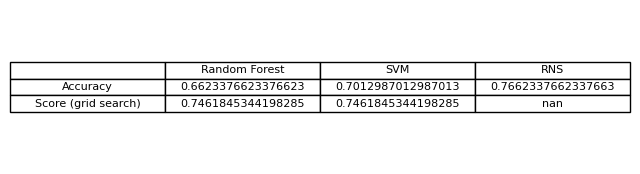

In [56]:
import matplotlib.pyplot as plt
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 2))

# Crear una tabla a partir del DataFrame
ax = plt.gca()
ax.axis('off')
table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Guardar la tabla como una imagen PNG
plt.savefig('DiabetesML.png', bbox_inches='tight', pad_inches=0.1)

plt.show()